In [22]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import seaborn as sns
from pathlib import Path
import numpy as np 
import matplotlib


In [23]:
#import the data
creep_df = pd.read_csv('../Data/Ni_superalloys_dataset.csv')
# convert df to float32 for specific libraries requiments
creep_df = creep_df.astype('float32')
# log tranform creep rupture life
Log_Creep_Life = np.log10(creep_df['creep_rupture_life'])
creep_df['Log_Creep_Life'] = Log_Creep_Life
creep_df = creep_df.drop(columns = ['creep_rupture_life'])


# sort the values in ascending creep life
creep_df.sort_values(by=['Log_Creep_Life'], ascending=True, ignore_index=True, inplace=True)

In [24]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ni              153 non-null    float32
 1   Al              153 non-null    float32
 2   Co              153 non-null    float32
 3   Cr              153 non-null    float32
 4   Mo              153 non-null    float32
 5   Re              153 non-null    float32
 6   Ru              153 non-null    float32
 7   Ta              153 non-null    float32
 8   W               153 non-null    float32
 9   Ti              153 non-null    float32
 10  Nb              153 non-null    float32
 11  T               153 non-null    float32
 12  stress          153 non-null    float32
 13  Log_Creep_Life  153 non-null    float32
dtypes: float32(14)
memory usage: 8.5 KB


In [25]:
# Extract features and targets
features = creep_df.iloc[:, 0:13]
targets = creep_df.iloc[:, 13]
features

,Ni,Al,Co,Cr,Mo,Re,Ru,Ta,W,Ti,Nb,T,stress
0,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1070.0,272.0
1,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100.0,220.0
2,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100.0,225.0
3,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1070.0,280.0
4,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,61.680000,6.0,9.0,3.5,1.5,4.0,0.0,8.0,6.0,0.2,0.0,1100.0,120.0
149,59.299999,5.8,5.8,2.9,3.9,4.9,6.0,5.6,5.8,0.0,0.0,1000.0,245.0
150,59.799999,5.6,5.6,4.6,2.4,6.4,5.0,5.6,5.0,0.0,0.0,1000.0,245.0
151,59.299999,5.8,5.8,2.9,3.9,4.9,6.0,5.6,5.8,0.0,0.0,1100.0,137.0


In [26]:
def coverage(y, yL, yH):
        return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

q: 0.025 | pearsonr: 0.6573244910042602
q: 0.5 | pearsonr: 0.7546325632024351
q: 0.975 | pearsonr: -0.05102028411871121
Pearson CC: 0.7546325632024351
R2 score: 0.527064309802104
RMSE: 0.22594741039912483
MAE: 0.18195953475988694
Coverage: 93.54838709677414
Interval Width: 1.0525454624765094
Composite Metric: 0.9391323348442568


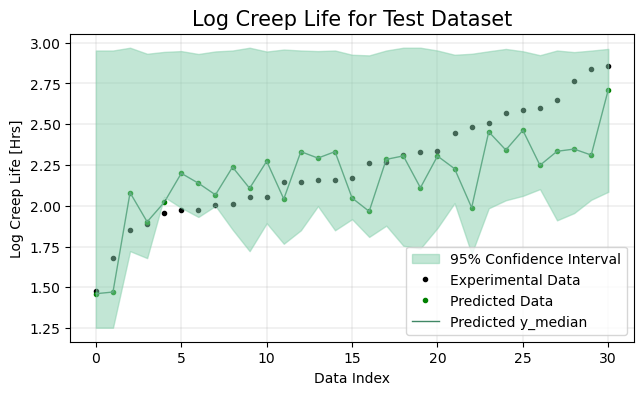

****************************************
q: 0.025 | pearsonr: 0.7873880718300479
q: 0.5 | pearsonr: 0.8868465718437626
q: 0.975 | pearsonr: 0.3115163462039011
Pearson CC: 0.8868465718437626
R2 score: 0.7306621590564413
RMSE: 0.2620654179729651
MAE: 0.1804945298963567
Coverage: 70.96774193548384
Interval Width: 0.861248381191404
Composite Metric: 0.8225343720943952


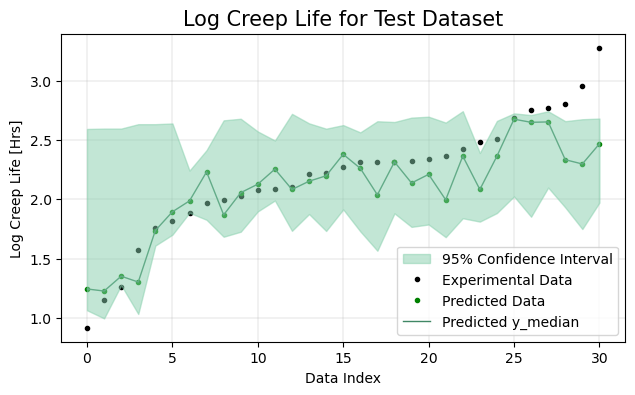

****************************************
q: 0.025 | pearsonr: 0.845963643997299
q: 0.5 | pearsonr: 0.8431402685977234
q: 0.975 | pearsonr: 0.4986735827674311
Pearson CC: 0.8431402685977234
R2 score: 0.6476462173891209
RMSE: 0.25825127149377775
MAE: 0.20613149110597703
Coverage: 74.19354838709674
Interval Width: 0.7847455239923344
Composite Metric: 0.8750262238524459


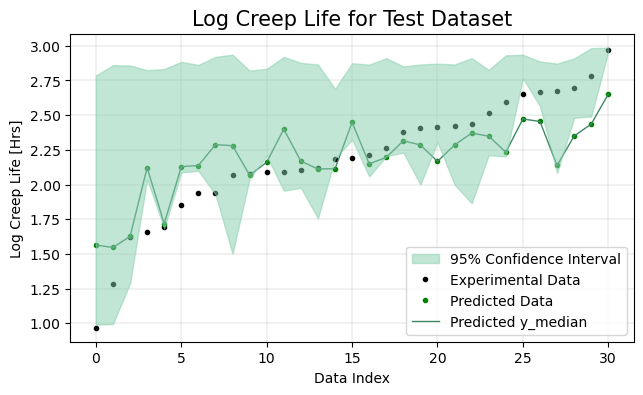

****************************************
q: 0.025 | pearsonr: 0.7358123722864229
q: 0.5 | pearsonr: 0.7890255861660875
q: 0.975 | pearsonr: 0.5290980062826822
Pearson CC: 0.7890255861660875
R2 score: 0.6181629297704303
RMSE: 0.227106049182769
MAE: 0.18252440689052055
Coverage: 83.33333333333331
Interval Width: 1.0066682660111286
Composite Metric: 0.8733439763037452


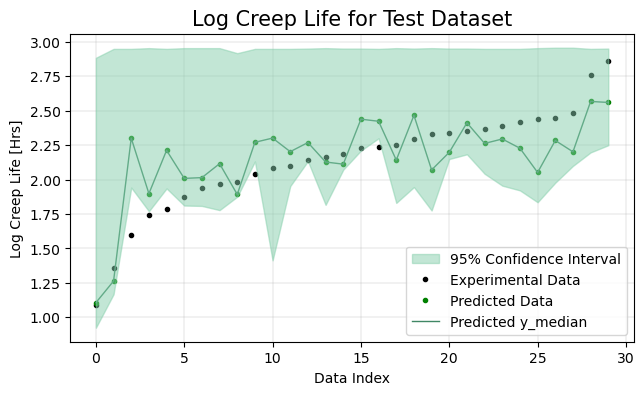

****************************************
q: 0.025 | pearsonr: 0.665871078734965
q: 0.5 | pearsonr: 0.6871766256188253
q: 0.975 | pearsonr: -0.047854972906492155
Pearson CC: 0.6871766256188253
R2 score: 0.36364242356734633
RMSE: 0.31481982933323166
MAE: 0.2606790385415783
Coverage: 83.33333333333333
Interval Width: 0.8704444056095529
Composite Metric: 0.9122096119969092


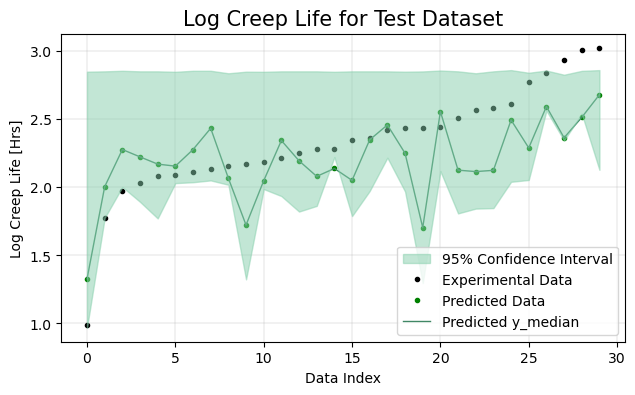

****************************************


In [27]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)


test_coverage = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)

quantiles = [0.025, 0.5, 0.975]

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):
                X_train, X_test = features.iloc[tr], features.iloc[ts]
                scale = StandardScaler()
                X_train = scale.fit_transform(X_train)
                X_test = scale.transform(X_test)
                y_train, y_test = targets.iloc[tr], targets.iloc[ts]
                X_train, X_val, y_train, y_val = train_test_split(
                        X_train, y_train, test_size=0.1)

                for q in quantiles:
                        parameters = {'loss_function': 'Quantile:alpha={:0.2f}'.format(q),
                                'num_boost_round': 5000}
                        model = CatBoostRegressor(**parameters)
                        model.fit(X_train, np.log(y_train),
                                eval_set=[(X_val, np.log(y_val))],
                                early_stopping_rounds=20,
                                verbose=False)
                        y_pred = np.exp(model.predict(X_test))
                        print(f'q: {q} | pearsonr: {pearsonr(y_test, y_pred)[0]}')
                        if q==0.025:
                           y_low = y_pred
                        elif q==0.5:
                                y_median = y_pred
                        elif q==0.975:
                               y_high = y_pred
                


                # Plot the predictions
                iteration_list = [i for i in range(len(y_test))]                     
                
                PearsonCC[j, i] = pearsonr(np.squeeze(y_test), np.squeeze(y_median))[0]
                R2_score[j, i] = r2_score(y_test, y_median)
                RMSE[j, i] = np.sqrt(mean_squared_error(y_test, y_median))
                MAE[j, i] = np.mean(abs(y_median-np.array(y_test)))

                print(f'Pearson CC: {PearsonCC[j, i]}')
                print(f'R2 score: {R2_score[j, i]}')
                print(f'RMSE: {RMSE[j, i]}')
                print(f'MAE: {MAE[j, i]}')

                test_coverage[j, i] = coverage(y_test, y_low, y_high)
                print(f'Coverage: {test_coverage[j, i]}')



                # Prediction interval width
                median_interval_width[j, i] = np.median(y_high - y_low)
                print(f'Interval Width: {median_interval_width[j, i]}')

                # Composite metric that combines the coverage and the invers of interval width
                composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
                print(f'Composite Metric: {composite_metric[j, i]}')


                            # Plot the predictions
                fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
                

                ## Uncertainty quantification plot
                ax[0].fill_between(iteration_list, y_low, y_high, alpha=0.5, color='#86cfac', zorder=5, label='95% Confidence Interval')
                ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
                ax[0].plot(iteration_list, y_median, 'go', markersize=3, label="Predicted Data")
                ax[0].plot(iteration_list, y_median, '-', linewidth=1, color="#408765", label="Predicted y_median")
                ax[0].legend(loc=4, fontsize=10, frameon=True)
                ax[0].set_xlabel("Data Index", fontsize=10)
                ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
                ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
                ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')
                fig.delaxes(ax[1])
                plt.show()
                print(40*'*')



In [28]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.754633,0.527064,0.225947,0.181960
1,0.886847,0.730662,0.262065,0.180495
2,0.843140,0.647646,0.258251,0.206131
3,0.789026,0.618163,0.227106,0.182524
4,0.687177,0.363642,0.314820,0.260679


In [29]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)


PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)


# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   },index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.792164,0.069288,0.577436,0.125149,0.257638,0.03233,0.202358,0.030669


In [30]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Interval Width,Composite Metric
0,93.548387,1.052545,0.939132
1,70.967742,0.861248,0.822534
2,74.193548,0.784746,0.875026
3,83.333333,1.006668,0.873344
4,83.333333,0.870444,0.912210


In [31]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std,
                    'Interval Width Mean': median_interval_width_mean, 'Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Interval Width Mean,Interval Width Std,Composite Metric Mean,Composite Metric Std
0,81.075269,7.940989,0.91513,0.099159,0.884449,0.039513
